### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск

In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [126]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [127]:
X[1].min(), X[1].max()

(0, 10)

In [128]:
X[2].min(), X[2].max()

(450, 2000)

In [129]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [130]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [131]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

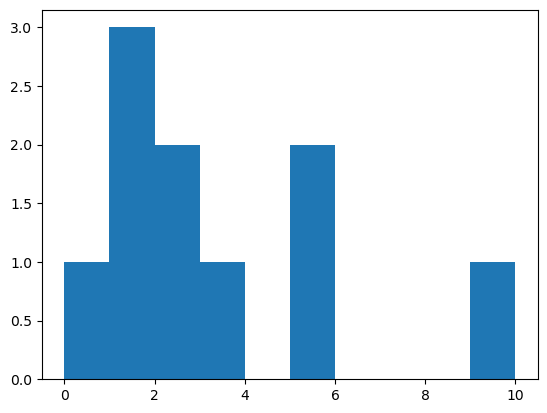

In [132]:
plt.hist(X[1])
plt.show()

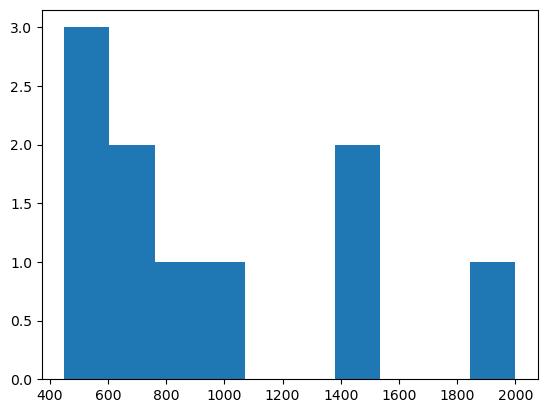

In [133]:
plt.hist(X[2])
plt.show()

In [134]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [135]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

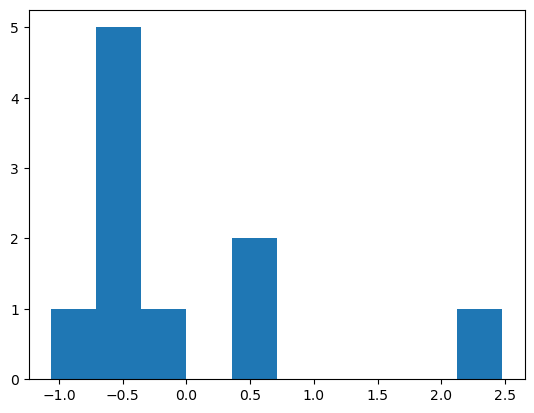

In [136]:
plt.hist(X_st[1])
plt.show()

In [137]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [138]:
X_st[2] = calc_std_fit(X[2])
X_st[2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [139]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [140]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [141]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [142]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [48.97594178  4.21396206  3.8500301   4.21180116] 87.17023192527044
200 [55.50216274  4.95035208  2.97995267  4.44787223] 27.8800577136793
300 [56.36766727  5.3867876   2.3048158   4.72276707] 26.130158999535222
400 [56.48245009  5.65898045  1.78063628  4.99953148] 25.68253843683916
500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.41382962551479
600 [56.49969133  5.95264982  1.03929184  5.47793845] 25.240698206237056
700 [56.49995906  6.03470225  0.77589591  5.66914875] 25.127246339675786
800 [56.49999457  6.0938447   0.56361685  5.82990753] 25.052342123121406
900 [56.49999928  6.13778238  0.39191637  5.96365141] 25.002715937162726
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475404


array([56.4999999 ,  6.17124081,  0.25269258,  6.07416416])

In [143]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [144]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.50784698  5.97750364  1.08351832  5.42226764] 13.222214061529089
1000 [56.51047211  6.20384913  0.15264278  6.15907458] 11.97642852075462
1500 [56.51056661  6.2741569  -0.1787118   6.43115941] 11.534849007099325
2000 [56.510601    6.2988798  -0.29773276  6.52939838] 11.377292576022441
2500 [56.51061339  6.3077444  -0.34053991  6.5647571 ] 11.320841272741276
3000 [56.51061784  6.31093184 -0.35593881  6.57747792] 11.300566039370123
3500 [56.51061945  6.31207841 -0.36147835  6.58205413] 11.29327661603256
4000 [56.51062003  6.31249087 -0.36347113  6.58370037] 11.290654903555662
4500 [56.51062023  6.31263925 -0.36418801  6.58429259] 11.289711847999266
5000 [56.51062031  6.31269263 -0.3644459   6.58450563] 11.28937260463764


array([56.51062031,  6.31269263, -0.3644459 ,  6.58450563])

L1 регуляризация

f(x, W) + (lambda_/2) * np.sum(np.abs(W))

L2 регуляризация

f(x, W) + (lambda_/2) * np.sum(W**2)

In [145]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [146]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-2)

In [147]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.41382962551479
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475404
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565486
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.90571241785009
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991188
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007853
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.904618882079912


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

### Практическое задание

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [148]:
lambda_ = [1e-8, 1e-6, 1e-4, 1e-2]
list_ = []
for lambda_iter in lambda_:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_iter)
    list_ = np.array(W)
    iter_ = np.array(lambda_)
list_, iter_ 


(array([56.21890547,  6.23067581, -0.16462974,  6.42092637]),
 array([1.e-08, 1.e-06, 1.e-04, 1.e-02]))

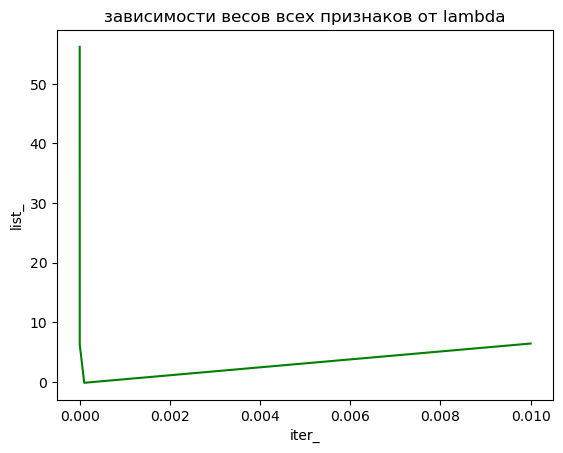

In [149]:
plt.title('зависимости весов всех признаков от lambda')
plt.xlabel('iter_')
plt.ylabel('list_')
plt.plot(iter_, list_, color='g')

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [150]:
# НЕТ

In [151]:
def standard_scale(X): 
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

def normal_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [152]:
ST = standard_scale(X)
ST

array([[-0.57735027, -0.57735027, -0.57940718, -0.58249071, -0.57894479,
        -0.57638682, -0.58043426, -0.58158972, -0.57735027, -0.57889218],
       [-0.57735027, -0.57735027, -0.57632113, -0.5670349 , -0.57575501,
        -0.57927597, -0.57426353, -0.57117319, -0.57735027, -0.57657893],
       [ 1.73205081,  1.73205081,  1.73204943,  1.73201633,  1.73204971,
         1.7320496 ,  1.73204669,  1.73203785,  1.73205081,  1.73205004],
       [-0.57735027, -0.57735027, -0.57632113, -0.58249071, -0.5773499 ,
        -0.57638682, -0.5773489 , -0.57927494, -0.57735027, -0.57657893]])

In [153]:
NS = normal_scale(X)
NS

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.25000000e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.33511348e-03, 6.67779633e-03,
        1.38026225e-03, 0.00000000e+00, 2.66844563e-03, 4.50225113e-03,
        0.00000000e+00, 1.00100100e-03],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.33511348e-03, 0.00000000e+00,
        6.90131125e-04, 1.25000000e-03, 1.33422282e-03, 1.00050025e-03,
        0.00000000e+00, 1.00100100e-03]])

In [154]:
NS_ST = normal_scale(ST)
ST_NS = standard_scale(NS)
NS_ST, ST_NS

(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.25000000e-03, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.33511348e-03, 6.67779633e-03,
         1.38026225e-03, 0.00000000e+00, 2.66844563e-03, 4.50225113e-03,
         0.00000000e+00, 1.00100100e-03],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.33511348e-03, 0.00000000e+00,
         6.90131125e-04, 1.25000000e-03, 1.33422282e-03, 1.00050025e-03,
         0.00000000e+00, 1.00100100e-03]]),
 array([[-0.57735027, -0.57735027, -0.57940718, -0.58249071, -0.57894479,
         -0.57638682, -0.58043426, -0.58158972, -0.57735027, -0.57889218],
        [-0.57735027, -0.57735027, -0.57632113, -0.5670349 , -0.57575501,
         -0.57927597, -

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [155]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
    
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2*lambda_ * np.sign(W))
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    return W

In [156]:
W = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-2)

Iter: 500, weights: [56.48770293  5.89477649  1.03752876  5.52344533], error 25.23817247298226
Iter: 1000, weights: [56.48999991  6.19035893  0.13241555  6.16752474], error 24.947361886214726
Iter: 1500, weights: [56.49        6.23930895 -0.11795225  6.3848129 ], error 24.914581305785866
Iter: 2000, weights: [56.49        6.25378156 -0.19420387  6.44901017], error 24.909266952805716
Iter: 2500, weights: [56.49        6.25942749 -0.22178715  6.47184168], error 24.90785729572388
Iter: 3000, weights: [56.49        6.26148204 -0.23172254  6.48004559], error 24.907415519955745
Iter: 3500, weights: [56.49        6.2622227  -0.23529906  6.48299779], error 24.907265031814134
Iter: 4000, weights: [56.49        6.26248935 -0.23658641  6.48406037], error 24.907211970630435
Iter: 4500, weights: [56.49        6.26258533 -0.23704979  6.48444284], error 24.907193015027154
Iter: 5000, weights: [56.49        6.26261988 -0.23721658  6.48458051], error 24.90718621068946
